# Customer analysis

In this exercise, you work for a consulting firm as data analyst. One of your clients asked for help to understand its customer buying behavior. 

You dispose of a dataset from its e-commerce website with 13 features : 

- order_id : ID if the order
- order_status : Status of the order
- order_purchase_timestamp : Timestamp of the purchase
- order_delivered_customer_date : Timestamp of the delivery to the customer
- payment_type : Method of payment
- payment_installments : Number of payments for this purchase (does NOT affect the payment value)
- payment_value : Total amount of the payment
- review_score : Score given by the client, ranges from 1 to 5
- customer_unique_id : ID of the customer who purchased
- customer_zip_code_prefix : Zip code of the customer
- customer_city : City of the customer
- customer_state : State of the customer
- product_category_name_english : Name of the product category in English

With this data, you have to analyze customer behavior with two techniques:

- Customer segmentation with RFM
- Cohort analysis from Sept 2016 to October 2018.

At the end, you have to present your analysis with actionable insights to improve the customer relationship of your client. 

# Understanding RFM Segmentation 

❓ What are the 3 metrics used in an RFM Segmentation? (hint : What does RFM stand for?) 

❓ Can you summarize what each metric measures in one sentence?

❓ What data / or type of data do you need for each metric ? 

Let's explore the dataset!

# Exploratory Data Analysis

Load the dataset and start an Exploratory Data Analysis

In [207]:
import pandas as pd
import numpy as np
import datetime
from statsmodels.stats.proportion import proportions_ztest

In [102]:
df = pd.read_csv('C:/Users/edenl/Desktop/ia_coding/notebooks/segmentation_client_rfm/db_customers.csv')
df

,order_id,order_status,order_purchase_timestamp,order_delivered_customer_date,payment_type,payment_installments,payment_value,review_score,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,credit_card,1.0,18.12,4,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,voucher,1.0,2.00,4,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,voucher,1.0,18.59,4,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,boleto,1.0,141.46,4,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,credit_card,3.0,179.12,5,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,auto
...,...,...,...,...,...,...,...,...,...,...,...,...,...
105378,9c5dedf39a927c1b2549525ed64a053c,delivered,2017-03-09 09:54:05,2017-03-17 15:08:01,credit_card,3.0,85.08,5,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP,health_beauty
105379,63943bddc261676b46f01ca7ac2f7bd8,delivered,2018-02-06 12:58:58,2018-02-28 17:37:56,credit_card,3.0,195.00,4,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,baby
105380,83c1379a015df1e13d02aae0204711ab,delivered,2017-08-27 14:46:43,2017-09-21 11:24:17,credit_card,5.0,271.01,5,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,home_appliances_2
105381,11c177c8e97725db2631073c19f07b62,delivered,2018-01-08 21:28:27,2018-01-25 23:32:54,credit_card,4.0,441.16,2,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,computers_accessories


❓ Which features should be formated in datetime ? 
Convert them

In [103]:
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])

In [104]:
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])

❓ Which features are Categorical ? List the unique values on these features.

❓ Check for missing values. What do you notice ? 


In [105]:
df.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of         order_id  order_status  order_purchase_timestamp  \
0          False         False                     False   
1          False         False                     False   
2          False         False                     False   
3          False         False                     False   
4          False         False                     False   
...          ...           ...                       ...   
105378     False         False                     False   
105379     False         False                     False   
105380     False         False                     False   
105381     False         False                     False   
105382     False         False                     False   

        order_delivered_customer_date  payment_type  payment_installments  \
0                               False         False                 False   
1                               False         False            

In [106]:
df.isnull().values.any()

True

❓ Can you find an explanation for the missing `order_delivered_customer_date` ? 
(hint : Check for non delivered orders)

In [107]:
o = df[["order_delivered_customer_date"]]
o.isnull().sum()

order_delivered_customer_date    3159
dtype: int64

In [108]:
df.order_status.unique() 

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [109]:

test = m.loc[m['order_status'] == 'delivered']
test
#there is no delivery that was not delivered 


NameError: name 'm' is not defined

❓ What are the proportions of each `order_status` ? 

❓ Which `order_status` do you think should be removed from the analysis

❓ What feature would you choose in the e-commerce dataset provided? 

In [110]:
df

,order_id,order_status,order_purchase_timestamp,order_delivered_customer_date,payment_type,payment_installments,payment_value,review_score,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,credit_card,1.0,18.12,4,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,voucher,1.0,2.00,4,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,voucher,1.0,18.59,4,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,boleto,1.0,141.46,4,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,credit_card,3.0,179.12,5,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,auto
...,...,...,...,...,...,...,...,...,...,...,...,...,...
105378,9c5dedf39a927c1b2549525ed64a053c,delivered,2017-03-09 09:54:05,2017-03-17 15:08:01,credit_card,3.0,85.08,5,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP,health_beauty
105379,63943bddc261676b46f01ca7ac2f7bd8,delivered,2018-02-06 12:58:58,2018-02-28 17:37:56,credit_card,3.0,195.00,4,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,baby
105380,83c1379a015df1e13d02aae0204711ab,delivered,2017-08-27 14:46:43,2017-09-21 11:24:17,credit_card,5.0,271.01,5,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,home_appliances_2
105381,11c177c8e97725db2631073c19f07b62,delivered,2018-01-08 21:28:27,2018-01-25 23:32:54,credit_card,4.0,441.16,2,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,computers_accessories


In [111]:
df[["review_score" , "payment_value" ,"order_purchase_timestamp" , "order_status" , "customer_unique_id"]]

,review_score,payment_value,order_purchase_timestamp,order_status,customer_unique_id
0,4,18.12,2017-10-02 10:56:33,delivered,7c396fd4830fd04220f754e42b4e5bff
1,4,2.00,2017-10-02 10:56:33,delivered,7c396fd4830fd04220f754e42b4e5bff
2,4,18.59,2017-10-02 10:56:33,delivered,7c396fd4830fd04220f754e42b4e5bff
3,4,141.46,2018-07-24 20:41:37,delivered,af07308b275d755c9edb36a90c618231
4,5,179.12,2018-08-08 08:38:49,delivered,3a653a41f6f9fc3d2a113cf8398680e8
...,...,...,...,...,...
105378,5,85.08,2017-03-09 09:54:05,delivered,6359f309b166b0196dbf7ad2ac62bb5a
105379,4,195.00,2018-02-06 12:58:58,delivered,da62f9e57a76d978d02ab5362c509660
105380,5,271.01,2017-08-27 14:46:43,delivered,737520a9aad80b3fbbdad19b66b37b30
105381,2,441.16,2018-01-08 21:28:27,delivered,5097a5312c8b157bb7be58ae360ef43c


❓ What method would you use to group the data? 

❓ What feature would you use to group the data? 

# What type of data is the R supposed to be? Is it in the right format? (Hint : investigate the difference between datetime and timedelta)

In [112]:
"payment_value"

'payment_value'

In [113]:
"order_purchase_timestamp"


'order_purchase_timestamp'

In [114]:
"order_status" , "review_score"


('order_status', 'review_score')

Group the data. (Hint: you can carry out the grouping one by one and then merge, or even better use the .agg method and get a robust grouping in one line of code)

In [115]:
group_by = df["e481f51cbdc54678b7cc49136f2d6af7"].groupby(df["order_id"])
group_by

KeyError: 'e481f51cbdc54678b7cc49136f2d6af7'

In [116]:
group_by = df["order_status"].groupby(df["order_id"])
group_by

In [117]:
group_by = df["order_status"].groupby(df["order_id"])
group_by

In [118]:
group_by = df["order_status"].groupby(df["customer_unique_id"])
group_by

In [119]:
group_by = df["order_status"].groupby(df["customer_unique_id"])
group_by

In [120]:
group_by = df["order_status"].groupby(df["customer_unique_id"])
group_by

So there is one more step to carry out before the data is ready : Calculate the recency base on the date of the purchase

❓ What is the date of the last purchase?

In [121]:
least_recent_date = df["order_purchase_timestamp"].min()
least_recent_date

Timestamp('2016-09-04 21:15:19')

❓What is the date of the most recent purchase?

In [122]:
order_date = df["order_purchase_timestamp"].max()
order_date

Timestamp('2018-10-17 17:30:18')

In [123]:
middle_date = df["order_purchase_timestamp"].median()
middle_date

Timestamp('2018-01-17 09:09:28')

❓How would you calculate the recency? (hint: what date would you use to compare with the purchase date? Today? probably not...)

In [124]:
test = order_date - middle_date
test

Timedelta('273 days 08:20:50')

Now that you have created a new dataset with the right columns, explore it to understand what you created.

❓Which column is the R? The F? The M?

In [125]:
df = df[[ "customer_unique_id" , "payment_value","order_purchase_timestamp"]]
df

,customer_unique_id,payment_value,order_purchase_timestamp
0,7c396fd4830fd04220f754e42b4e5bff,18.12,2017-10-02 10:56:33
1,7c396fd4830fd04220f754e42b4e5bff,2.00,2017-10-02 10:56:33
2,7c396fd4830fd04220f754e42b4e5bff,18.59,2017-10-02 10:56:33
3,af07308b275d755c9edb36a90c618231,141.46,2018-07-24 20:41:37
4,3a653a41f6f9fc3d2a113cf8398680e8,179.12,2018-08-08 08:38:49
...,...,...,...
105378,6359f309b166b0196dbf7ad2ac62bb5a,85.08,2017-03-09 09:54:05
105379,da62f9e57a76d978d02ab5362c509660,195.00,2018-02-06 12:58:58
105380,737520a9aad80b3fbbdad19b66b37b30,271.01,2017-08-27 14:46:43
105381,5097a5312c8b157bb7be58ae360ef43c,441.16,2018-01-08 21:28:27


Now for each metric independantly, build clutsers (Hint 1: you can use `.describe()` to have insights about each metrics. Hint 2: Don't choose more than 3 clusters)

In [126]:
df.describe()

,payment_value
count,105382.000000
mean,154.617262
std,217.261585
min,0.000000
25%,56.930000
50%,100.120000
75%,172.847500
max,13664.080000


Now that you have clusters for each category, explain the different buying behaviors

# Working with cohorts

❓What is a cohort? 

In [200]:

import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from operator import attrgetter
import matplotlib.colors as mcolors

❓Why is it interesting to analyse cohorts ? 

❓What data (already existing in the original dataset) do we need to build a cohort? 

Build a new df with just these 3 features

In [202]:
df_copy = df_copy[["order_purchase_timestamp" , "customer_unique_id" , "payment_value"]]

df_copy

,order_purchase_timestamp,customer_unique_id,payment_value
0,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,18.12
1,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,2.00
2,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,18.59
3,2018-07-24 20:41:37,af07308b275d755c9edb36a90c618231,141.46
4,2018-08-08 08:38:49,3a653a41f6f9fc3d2a113cf8398680e8,179.12
...,...,...,...
105378,2017-03-09 09:54:05,6359f309b166b0196dbf7ad2ac62bb5a,85.08
105379,2018-02-06 12:58:58,da62f9e57a76d978d02ab5362c509660,195.00
105380,2017-08-27 14:46:43,737520a9aad80b3fbbdad19b66b37b30,271.01
105381,2018-01-08 21:28:27,5097a5312c8b157bb7be58ae360ef43c,441.16


Using the `pandas.Serie.dt.to_period()` methode, create a new feature converting `order_purchase_timestamp` in months

In [ ]:
df_copy['Date'] = pd.to_datetime(df_copy['Date'], errors='coerce')

In [208]:
df_copy['order_month'] = df_copy['order_purchase_timestamp'].dt.to_period('M')
df_copy

AttributeError: Can only use .dt accessor with datetimelike values

In [204]:
datetime_series.dt.month

0    10
1    10
2    10
3    10
4    10
dtype: int64

In [205]:
df_copy['cohort'] = df_copy.groupby('customer_unique_id')['order_purchase_timestamp'] \
                 .transform('min') \
                 .dt.to_period('M') 
df_copy

AttributeError: Can only use .dt accessor with datetimelike values

In [195]:
# For the teachers, To filter by only the customer that have done 2 or more purchases
df =pd.DataFrame(df.groupby('customer_unique_id').size()[df.groupby('customer_unique_id').size() > 1])
df = df.merge(df, how='left', on='customer_unique_id').rename(columns={0:'na'})

df

,0_x,0_y
customer_unique_id,,


In [197]:
df_copy

,order_purchase_timestamp,customer_unique_id,payment_value
0,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,18.12
1,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,2.00
2,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,18.59
3,2018-07-24 20:41:37,af07308b275d755c9edb36a90c618231,141.46
4,2018-08-08 08:38:49,3a653a41f6f9fc3d2a113cf8398680e8,179.12
...,...,...,...
105378,2017-03-09 09:54:05,6359f309b166b0196dbf7ad2ac62bb5a,85.08
105379,2018-02-06 12:58:58,da62f9e57a76d978d02ab5362c509660,195.00
105380,2017-08-27 14:46:43,737520a9aad80b3fbbdad19b66b37b30,271.01
105381,2018-01-08 21:28:27,5097a5312c8b157bb7be58ae360ef43c,441.16


Now groupby `['cohort', 'order_month']` and aggregate by `nunique()` `customer_unique_id`

In [196]:
grouped_df = df_copy.groupby(["cohort", "order_month"])

KeyError: 'cohort'

Finally, create a feature called `['period_number']` where you substract the `cohort` to the `order_month` and get the `'n'` attribute thanks to the `operator.attrgetter` method

Explore a cohort (for example 2017-01) and try to understand what it shows

Pivot the DataFrame using the methode : `DataFrame.pivot_table` (hint : use `'cohort'` as `index`, `'period_number'` as columns, and `'n_customers'` as `values`)

Now divide all the values (except you column 0) by the column 0 and name this new DataFrame `retention_matrix`

Plot your `retention matrix` using the code below : 

NameError: name 'retention_matrix' is not defined

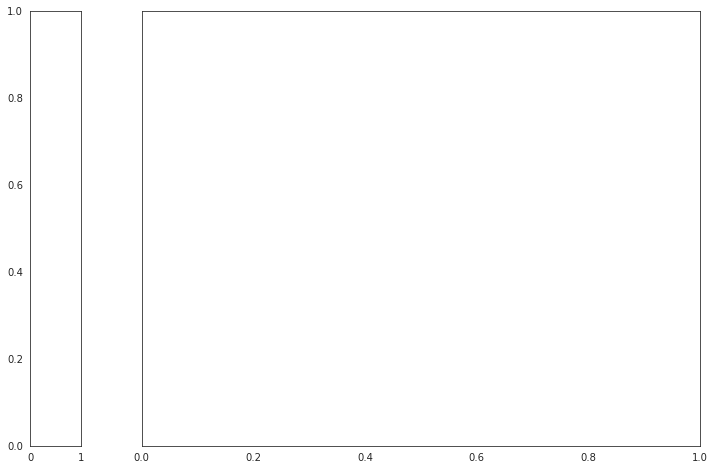

In [140]:

with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={'width_ratios': [1, 11]})
    
    # retention matrix
    sns.heatmap(retention_matrix, 
                mask=retention_matrix.isnull(), 
                annot=True, 
                fmt='.0%', 
                cmap='RdYlGn', 
                ax=ax[1])
    ax[1].set_title('Monthly Cohorts: User Retention', fontsize=16)
    ax[1].set(xlabel='# of periods',
              ylabel='')

    # cohort size
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df, 
                annot=True, 
                cbar=False, 
                fmt='g', 
                cmap=white_cmap, 
                ax=ax[0])

    fig.tight_layout()


What do you notice? 

How could we have know that before? (hint : Calculate the percentage of customers who have ordered more than once)

Here is the code for the analysis of customers who have bought more than once : 

In [149]:
#start from your df created doing the RFM segmentation
df_c = df[['customer_unique_id', 'order_id',
           'order_purchase_timestamp']].drop_duplicates()

df_c['order_month'] = df_c['order_purchase_timestamp'].dt.to_period('M')

df_more = pd.DataFrame(df_c.groupby('customer_unique_id').size()[
                       df_c.groupby('customer_unique_id').size() > 1])

df_c = df_c.merge(df_more, how='left', on='customer_unique_id').rename(
    columns={0: 'na'})

df_c = df_c[df_c['na'].notna()]
df_c['cohort'] = df_c.groupby('customer_unique_id')['order_purchase_timestamp'] \
    .transform('min') \
    .dt.to_period('M')

df_cohort = df_c.groupby(['cohort', 'order_month']) \
    .agg(n_customers=('customer_unique_id', 'nunique')) \
    .reset_index(drop=False)
df_cohort['period_number'] = (
    df_cohort.order_month - df_cohort.cohort).apply(attrgetter('n'))
cohort_pivot = df_cohort.pivot_table(index='cohort',
                                     columns='period_number',
                                     values='n_customers')
cohort_size = cohort_pivot.iloc[:, 0]
retention_matrix = cohort_pivot.divide(cohort_size, axis=0)

with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={
                           'width_ratios': [1, 11]})

    # retention matrix
    sns.heatmap(retention_matrix,
                mask=retention_matrix.isnull(),
                annot=True,
                fmt='.0%',
                cmap='RdYlGn',
                ax=ax[1])
    ax[1].set_title('Monthly Cohorts: User Retention', fontsize=16)
    ax[1].set(xlabel='# of periods',
              ylabel='')

    # cohort size
    cohort_size_df = pd.DataFrame(cohort_size).rename(
        columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df,
                annot=True,
                cbar=False,
                fmt='g',
                cmap=white_cmap,
                ax=ax[0])

    fig.tight_layout()

KeyError: "None of [Index(['customer_unique_id', 'order_id', 'order_purchase_timestamp'], dtype='object')] are in the [columns]"